# Scaling Data Lesson
### Corey Solitaire
### 09/28/2020

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Import Data
from acquire import get_telco_data
# Transform Data
from wrangle import wrangle_telco
# Split Data
from split_scale import train_valid_test
# Scale Data
from split_scale import add_scaled_columns, standard_scaler, uniform_scaler, gaussian_scaler, min_max_scaler, iqr_robust_scaler 
# Inverse Scale
from split_scale import scale_inverse

## Wrangle Data

In [2]:
# Wranle (acquire and prepare) : 
df = wrangle_telco(get_telco_data(cached = True))

## Split Data

In [3]:
# Split data

train, validate, test = train_valid_test(df)
print('train', train.shape)
print('validate', validate.shape)
print('test', test.shape)

train (949, 4)
validate (407, 4)
test (339, 4)


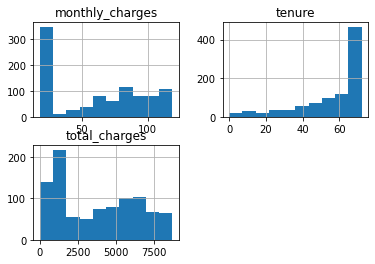

In [4]:
train.hist()
plt.show()

In [5]:
train.describe()

,monthly_charges,tenure,total_charges
count,949.000000,949.000000,949.000000
mean,61.224921,56.495258,3729.519968
std,34.779455,18.354262,2600.297158
min,18.400000,0.000000,0.000000
25%,22.950000,47.000000,1237.650000
50%,64.700000,64.000000,3603.450000
75%,90.400000,71.000000,6052.250000
max,118.650000,72.000000,8670.100000


In [6]:
train.head(1)

,customer_id,monthly_charges,tenure,total_charges
1256,7501-IWUNG,73.8,61,4616.05


# 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can understand .

*****
# MinMaxScaler: (Linear Function)
-Min-max scaling is a linear scaling method that transforms our features such that the range is between 0 and 1

-Most common scaler because it keeps the range of variabes between 0-1, similar to boolean variables

*****

In [7]:
#MinMaxScaler
df = wrangle_telco(get_telco_data(cached = True))
train, validate, test = train_valid_test(df)
scaler1, train1, validate1, test1 = add_scaled_columns(
    train,
    validate,
    test,
    scaler = MinMaxScaler(),
    columns_to_scale=['monthly_charges', 'tenure', 'total_charges'],
)

In [8]:
train1.shape

(949, 7)

In [9]:
train1.head(1)

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
1256,7501-IWUNG,73.8,61,4616.05,0.552618,0.847222,0.53241


### Visualization

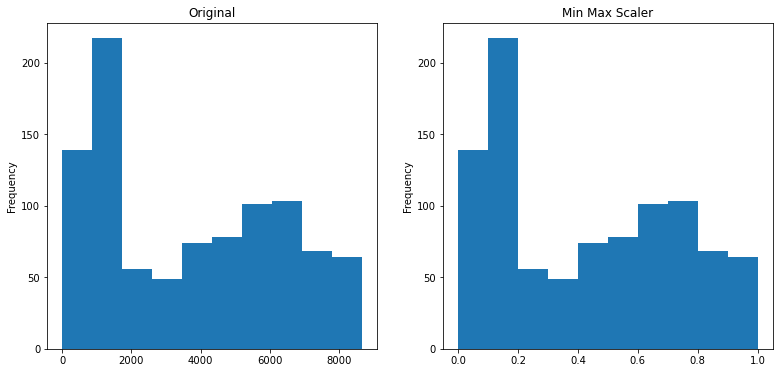

In [10]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train1.total_charges.plot.hist(title='Original')
plt.subplot(122)
train1.total_charges_scaled.plot.hist(title='Min Max Scaler')
plt.show()

*****

# Standard Scaler: (Linear Function)


- Standardization is a linear transformation of our data such that is looks like the standard normal distribution. That is, it will have a mean of 0 and a standard deviation of 1

**Sometimes this is split into two operations:**

    - Scaling is dividing each data point by the standard deviation. This causes the resulting dataset to have a 
      standard deviation of 1.
    
     - Centering is subtracting the mean from each data point. This causes the resulting dataset to have a mean 
        of 0.
  
*****

In [11]:
#StandardScaler
df = wrangle_telco(get_telco_data(cached = True))
train, validate, test = train_valid_test(df)
scaler2, train2, validate2, test2 = add_scaled_columns(
    train,
    validate,
    test,
    scaler = StandardScaler(),
    columns_to_scale=['monthly_charges', 'tenure', 'total_charges'],
)

In [12]:
train2.shape

(949, 7)

In [13]:
train2.head(1)

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
1256,7501-IWUNG,73.8,61,4616.05,0.361757,0.245562,0.341114


### Visualization

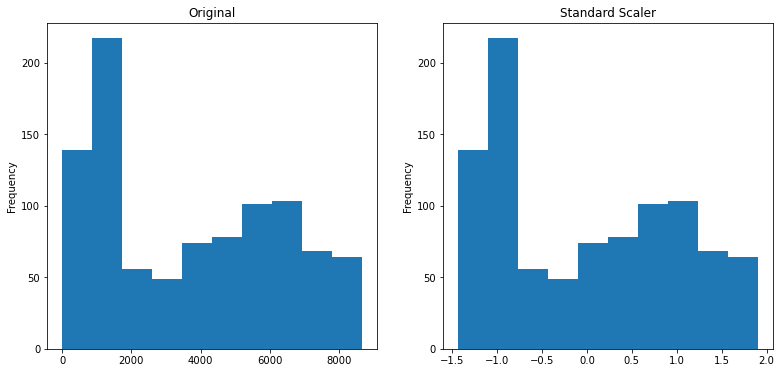

In [14]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train2.total_charges.plot.hist(title='Original')
plt.subplot(122)
train2.total_charges_scaled.plot.hist(title='Standard Scaler')
plt.show()

*****

# Robust Scaler: (Linear Scaler)

- A robust scaler is another linear transformation that follows the same idea as the standard scaler but uses parameters that are more robust to outliers

*****

In [15]:
#RobustScaler
df = wrangle_telco(get_telco_data(cached = True))
train, validate, test = train_valid_test(df)
scaler3, train3, validate3, test3 = add_scaled_columns(
    train,
    validate,
    test,
    scaler = RobustScaler(),
    columns_to_scale=['monthly_charges', 'tenure', 'total_charges'],
)

In [16]:
train3.shape

(949, 7)

In [17]:
train3.head(1)

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
1256,7501-IWUNG,73.8,61,4616.05,0.134915,-0.125,0.210319


### Visualization

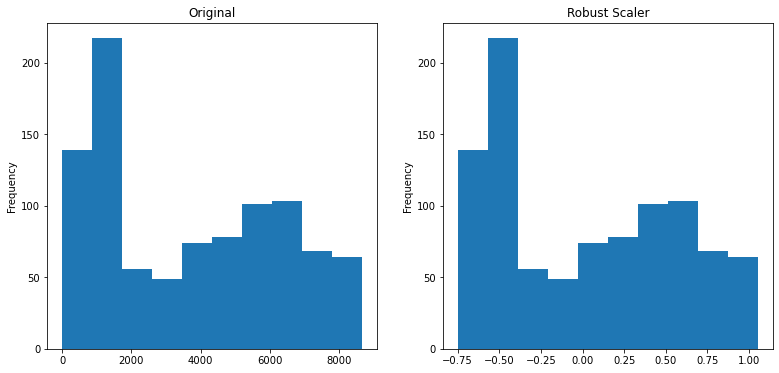

In [18]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train3.total_charges.plot.hist(title='Original')
plt.subplot(122)
train3.total_charges_scaled.plot.hist(title='Robust Scaler')
plt.show()

# 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

*****

# Scale Inverse:
-Reverts scaled data columns back to normal

*****

In [19]:
# Transform Data
df = wrangle_telco(get_telco_data(cached = True))
train, validate, test = train_valid_test(df)
scaler4, train4, validate4, test4 = add_scaled_columns(
    train,
    validate,
    test,
    scaler = QuantileTransformer(output_distribution ='uniform'),
    columns_to_scale=['monthly_charges', 'tenure', 'total_charges'],
)
# Visualize Transformation
train4.head(1)

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
1256,7501-IWUNG,73.8,61,4616.05,0.565401,0.440401,0.584388


In [20]:
scaler4

QuantileTransformer()

In [21]:
# Inverse Transform
itrain, ivalidate, itest = scale_inverse(
    train4,
    validate4,
    test4,
    scaler4,
    columns_to_scale=['monthly_charges', 'total_charges', 'tenure'],
    columns_to_inverse=['monthly_charges_scaled', 'total_charges_scaled', 'tenure_scaled'],
)

In [22]:
itrain.head(1)

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled,monthly_charges_scaled_inverse,total_charges_scaled_inverse,tenure_scaled_inverse
1256,7501-IWUNG,73.8,61,4616.05,0.565401,0.440401,0.584388,73.8,4616.05,61.0


## Findings:
- Results are similar, some int values have been changed to floats

# 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

*****

# Uniform Scaler: (Non Linear Scaler)

- A uniform scaler smooths out unusual distributions and it spreads out the most frequent values and reduces the impact of (marginal) outliers 

*****

In [23]:
#UniformScaler
df = wrangle_telco(get_telco_data(cached = True))
train, validate, test = train_valid_test(df)
scaler4, train4, validate4, test4 = add_scaled_columns(
    train,
    validate,
    test,
    scaler = QuantileTransformer(output_distribution ='uniform'),
    columns_to_scale=['monthly_charges', 'tenure', 'total_charges'],
)

### Visualization

In [24]:
train4.shape

(949, 7)

In [25]:
train4.head(1)

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,tenure_scaled,total_charges_scaled
1256,7501-IWUNG,73.8,61,4616.05,0.565401,0.440401,0.584388


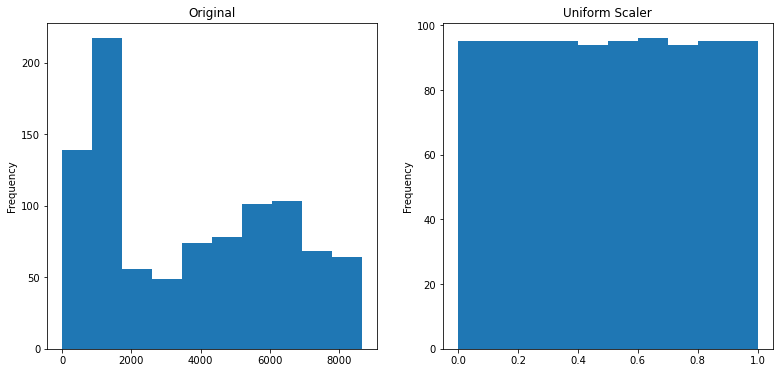

In [26]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train4.total_charges.plot.hist(title='Original')
plt.subplot(122)
train4.total_charges_scaled.plot.hist(title='Uniform Scaler')
plt.show()

# 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

## Uniform Scaler w/o uniform distribution

In [27]:
#UniformScaler
df = wrangle_telco(get_telco_data(cached = True))
train, validate, test = train_valid_test(df)
scaler5, train5, validate5, test5 = add_scaled_columns(
    train,
    validate,
    test,
    scaler = QuantileTransformer(),
    columns_to_scale=['monthly_charges', 'tenure', 'total_charges'],
)

## Visualization

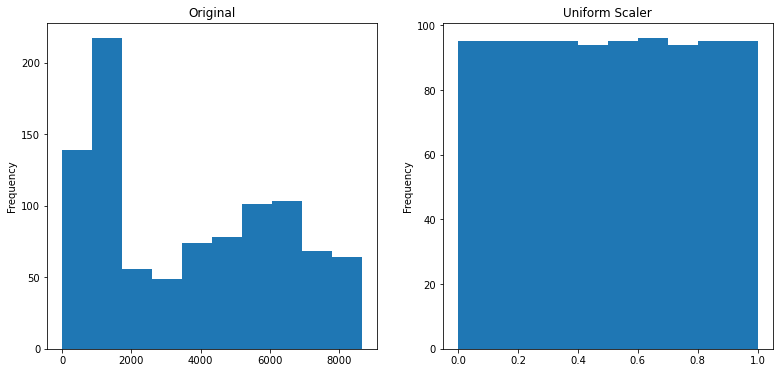

In [28]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train5.total_charges.plot.hist(title='Original')
plt.subplot(122)
train5.total_charges_scaled.plot.hist(title='Uniform Scaler')
plt.show()

### Takeaway:
- No observable change with or without output_distribution argument

# 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!